In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [24]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and (plot the results
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
p_df = pd.DataFrame(scores, columns=['date','precipitation'])
p_df.set_index(p_df['date'], inplace=True)

# Sort the dataframe by date
p_df = p_df.sort_index()



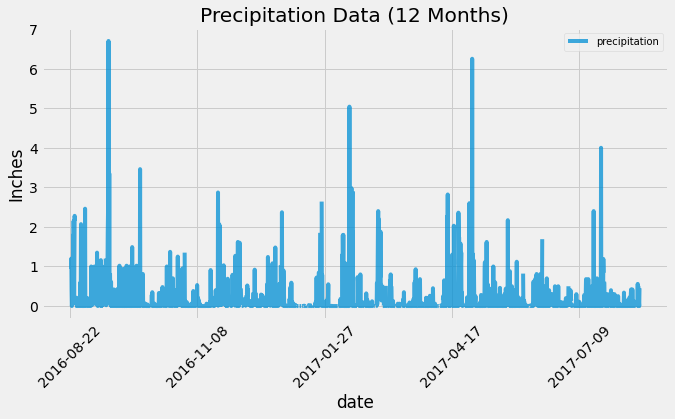

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
p_df.plot(title="Precipitation Data (12 Months)", alpha=.75, figsize=(10,5), rot=45)
plt.legend(loc='upper right', prop={'size': 10})
plt.ylabel("Inches")
plt.show()

In [29]:

p_df.describe()

,precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# How many stations are available in this dataset?
station_total = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {station_total} stations available in this dataset.")

There are 9 stations available in this dataset.


In [31]:
# What are the most active stations?
# List the stations and the counts in descending order.
act_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
print(f"The most active stations are:") 
act_stations


The most active stations are:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"Station USC00519281 has min, max, and avg temperatures of {station_stats}.")

Station USC00519281 has min, max, and avg temperatures of [(54.0, 85.0, 71.66378066378067)].


<function matplotlib.pyplot.show(close=None, block=None)>

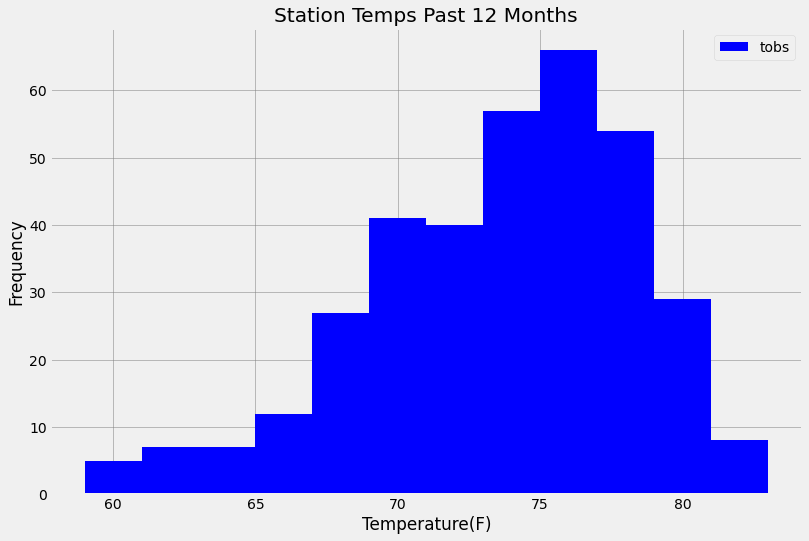

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= last_year).all()

temp_df = pd.DataFrame (temp_obs, columns=['tobs'])
temp_df.plot.hist(bins=12, color='blue', figsize=(12,8))

plt.title('Station Temps Past 12 Months')
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.grid(b='True',which='major', linestyle='-', linewidth='0.5', color='grey')
plt.show

In [35]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):    
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# function usage example
print(calc_temps('2017-02-28', '2017-03-01'))

[(64.0, 70.64285714285714, 74.0)]


# Challenge